# Práctica 3: Aplicación de Business Intelligence y Minería de Datos

# 1. Carga y Exploración del Dataset

In [1]:
import os
import pandas as pd

# Leer todos los archivos de la carpeta 'emails'
ruta = "emails/"
documentos = []
nombres = []

for archivo in os.listdir(ruta):
    if archivo.endswith(".txt"):
        with open(os.path.join(ruta, archivo), 'r', encoding='utf-8', errors='ignore') as f:
            documentos.append(f.read())
            nombres.append(archivo)

df_original = pd.DataFrame({'archivo': nombres, 'contenido': documentos})
df_original.head()

,archivo,contenido
0,e7a18abc2cf691d389ff67027b880ebc9ca210af.txt,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
1,b8f808540d295ed8ee1773a885158961e7ca9178.txt,From: backon@vms.huji.ac.il\nSubject: Re: From...
2,8923dc0f89c344107b79c328265b51c529b0515d.txt,From: lfoard@hopper.Virginia.EDU (Lawrence C. ...
3,e1087e9534b37772a34d0b0ca05afd799e58e0ee.txt,From: francis@ircam.fr (Joseph Francis)\nSubje...
4,8fd8264ad00961fbca5bcc838ae3fcd0af60a49a.txt,From: khera@cs.duke.edu (Vivek Khera)\nSubject...


In [2]:
# copiamos del original para trabajar
df = df_original.copy()

In [3]:
# Backup de los datos a CSV para no estar leyendo los archivos cada vez, de necesitar
df.to_csv('emails.csv', index=False)

## 1.1 Cargar desde CSV

In [4]:
# Lectura desde CSV
import pandas as pd
df = pd.read_csv('emails.csv')
df.head()

,archivo,contenido
0,e7a18abc2cf691d389ff67027b880ebc9ca210af.txt,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
1,b8f808540d295ed8ee1773a885158961e7ca9178.txt,From: backon@vms.huji.ac.il\nSubject: Re: From...
2,8923dc0f89c344107b79c328265b51c529b0515d.txt,From: lfoard@hopper.Virginia.EDU (Lawrence C. ...
3,e1087e9534b37772a34d0b0ca05afd799e58e0ee.txt,From: francis@ircam.fr (Joseph Francis)\nSubje...
4,8fd8264ad00961fbca5bcc838ae3fcd0af60a49a.txt,From: khera@cs.duke.edu (Vivek Khera)\nSubject...


In [5]:
df

,archivo,contenido
0,e7a18abc2cf691d389ff67027b880ebc9ca210af.txt,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
1,b8f808540d295ed8ee1773a885158961e7ca9178.txt,From: backon@vms.huji.ac.il\nSubject: Re: From...
2,8923dc0f89c344107b79c328265b51c529b0515d.txt,From: lfoard@hopper.Virginia.EDU (Lawrence C. ...
3,e1087e9534b37772a34d0b0ca05afd799e58e0ee.txt,From: francis@ircam.fr (Joseph Francis)\nSubje...
4,8fd8264ad00961fbca5bcc838ae3fcd0af60a49a.txt,From: khera@cs.duke.edu (Vivek Khera)\nSubject...
...,...,...
18823,ba52aa01c0d63f8e4f8121071729b9a0d52d644c.txt,From: aaronc@athena.mit.edu (Aaron Bryce Carde...
18824,899e43bdadce0b5b69c10e81c4e5704997e5815f.txt,Subject: Re: Monitors - should they be kept on...
18825,0f4a797abc839a11588ef64adc6e37bca645fe12.txt,From: The Always Fanatical: Patrick Ellis <IO1...
18826,16ab45062132bf74bee40012bb677cc742c52fab.txt,From: <KEVXU@CUNYVM.BITNET>\nSubject: Re: Info...


## 1.2. Exploración Inicial

In [6]:
# Número total de documentos
print(f"Número total de documentos: {len(df)}")

# Longitud promedio
df['longitud'] = df['contenido'].apply(len)
print(f"Longitud promedio del texto: {df['longitud'].mean():.2f}")

# Ejemplos de textos
df['contenido'].sample(3).values

Número total de documentos: 18828
Longitud promedio del texto: 1801.11


array(['From: yozzo@watson.ibm.com (Ralph Yozzo)\nSubject: Re: How to Diagnose Lyme... really\n\nIn article <19688@pitt.UUCP> geb@cs.pitt.edu (Gordon Banks) writes:\n>\n>In article <1993Apr12.201056.20753@ns1.cc.lehigh.edu> mcg2@ns1.cc.lehigh.edu (Marc Gabriel) writes:\n>\n>>Now, I\'m not saying that culturing is the best way to diagnose; it\'s very\n>>hard to culture Bb in most cases.  The point is that Dr. N has developed a\n>>"feel" for what is and what isn\'t LD.  This comes from years of experience.\n>>No serology can match that.  Unfortunately, some would call Dr. N a "quack"\n>>and accuse him of trying to make a quick buck.\n>>\n>Why do you think he would be called a quack?  The quacks don\'t do cultures.\n>They poo-poo doing more lab tests:  "this is Lyme, believe me, I\'ve\n>seen it many times.  The lab tests aren\'t accurate.  We\'ll treat it\n>now."  Also, is Dr. N\'s practice almost exclusively devoted to treating\n>Lyme patients?  I don\'t know *any* orthopedic surgeons wh

In [7]:
# dividimos en columnas para tener el compo body limpio
import re

def parse_email(texto):
    # Extraer campo From
    match_from = re.search(r'^From:\s*(.*)', texto, re.MULTILINE)
    from_ = match_from.group(1).strip() if match_from else None

    # Extraer campo Subject
    match_subject = re.search(r'^Subject:\s*(.*)', texto, re.MULTILINE)
    subject = match_subject.group(1).strip() if match_subject else None

    # Determinar si es respuesta
    es_respuesta = subject.lower().startswith("re:") if subject else False

    # Eliminar encabezados (todo hasta la primera línea vacía)
    body = re.split(r'\n\s*\n', texto, maxsplit=1)
    body = body[1].strip() if len(body) > 1 else texto

    # Eliminar la firma antes de buscar citas
    body_limpio = re.split(r'\n--\s*\n', body)[0]  # toma solo lo que está antes de la firma (en correos antiguos -- separa la firma)

    # 5. Dividir el cuerpo en líneas
    lineas = body_limpio.splitlines()

    # 6. Marcar si cada línea es una cita (empieza con al menos un '>')
    patrones_omitir = [
        r'other stuff deleted',
        r'text omitted',
        r'message removed',
        r'content skipped',
    ]
    niveles_cita = []
    for linea in lineas:
        m = re.match(r'^(>+)', linea)
        if m:
            contenido = linea[m.end():].strip()
            simbolos = sum(1 for c in contenido if not c.isalnum())
            letras = sum(1 for c in contenido if c.isalnum())

            es_decorativa = (
                letras < 5 or
                simbolos > letras or
                len(contenido.split()) < 3 or
                any(re.search(pat, contenido, re.IGNORECASE) for pat in patrones_omitir)
            )

            if not es_decorativa:
                niveles_cita.append(len(m.group(1)))
            else:
                niveles_cita.append(0)
        else:
            niveles_cita.append(0)


    # 7. ¿El correo tiene al menos una cita?
    tiene_cita = any(n > 0 for n in niveles_cita)

    # 8. Nivel máximo de citas encontradas
    nivel_maximo_cita = max(niveles_cita) if niveles_cita else 0

    return pd.Series([from_, subject, es_respuesta, body, tiene_cita, nivel_maximo_cita])

# Aplicamos al DataFrame original
df[['from', 'subject', 'es_respuesta', 'body', 'tiene_cita', 'nivel_maximo_cita']] = df['contenido'].apply(parse_email)
df = df.drop(columns=['contenido'])  # opcional podemos quitar el contenido
df.head()


,archivo,longitud,from,subject,es_respuesta,body,tiene_cita,nivel_maximo_cita
0,e7a18abc2cf691d389ff67027b880ebc9ca210af.txt,1417,healta@saturn.wwc.edu (Tammy R Healy),Re: YOU WILL ALL GO TO HELL!!!,True,In article <C5s9zM.9E0@cbnewsj.cb.att.com> dec...,True,2
1,b8f808540d295ed8ee1773a885158961e7ca9178.txt,5272,backon@vms.huji.ac.il,Re: From Israeli press. TORTURE.,True,"In article <1483500344@igc.apc.org>, Center fo...",True,1
2,8923dc0f89c344107b79c328265b51c529b0515d.txt,2110,lfoard@hopper.Virginia.EDU (Lawrence C. Foard),Re: New Study Out On Gay Percentage,True,In article <1993Apr16.200354.8045@magnus.acs.o...,True,3
3,e1087e9534b37772a34d0b0ca05afd799e58e0ee.txt,2319,francis@ircam.fr (Joseph Francis),Re: Can't wear contacts after RK/PRK?,True,In article <1993Apr16.063425.163999@zeus.calpo...,True,1
4,8fd8264ad00961fbca5bcc838ae3fcd0af60a49a.txt,1126,khera@cs.duke.edu (Vivek Khera),Re: 'makedepend' problem,True,In article <3032@cronos.metaphor.com> mlt@blue...,False,0


Distribución de correos que son respuesta (Re:):
es_respuesta
True     12350
False     6478
Name: count, dtype: int64

Porcentaje de correos que contienen al menos una cita: 50.19%
numero minimo de citas 0
numero maximo de citas 6


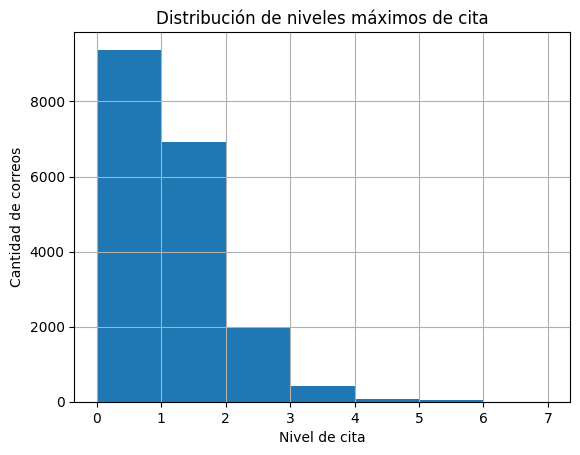

In [8]:
# Distribución de respuestas
print("Distribución de correos que son respuesta (Re:):")
print(df['es_respuesta'].value_counts())

# Correos que contienen citas
print(f"\nPorcentaje de correos que contienen al menos una cita: {df['tiene_cita'].mean() * 100:.2f}%")

print(f"numero minimo de citas",df['nivel_maximo_cita'].min())
print(f"numero maximo de citas",df['nivel_maximo_cita'].max())

# Histograma del nivel máximo de cita
import matplotlib.pyplot as plt

df['nivel_maximo_cita'].hist(bins=range(0, df['nivel_maximo_cita'].max()+2))
plt.title("Distribución de niveles máximos de cita")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")
plt.show()

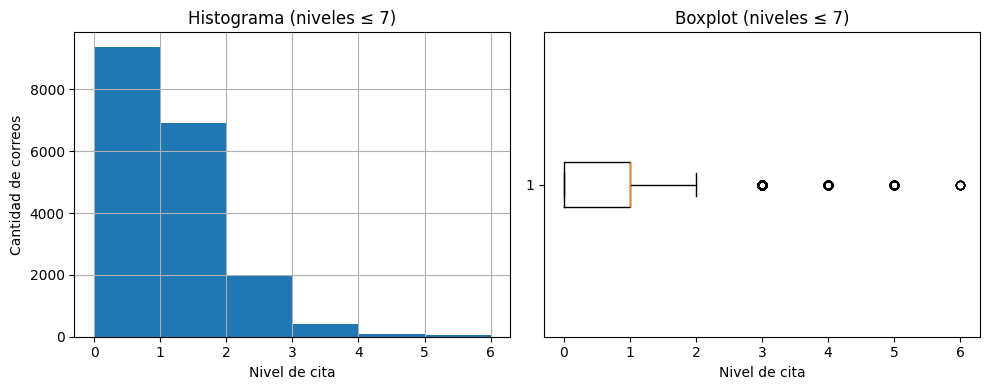

In [9]:
import matplotlib.pyplot as plt

# Filtrar niveles razonables (e.g. hasta 7)
niveles_filtrados = df[df['nivel_maximo_cita'] <= 7]['nivel_maximo_cita']

plt.figure(figsize=(10, 4))

# Histograma
plt.subplot(1, 2, 1)
niveles_filtrados.hist(bins=range(0, 7))
plt.title("Histograma (niveles ≤ 7)")
plt.xlabel("Nivel de cita")
plt.ylabel("Cantidad de correos")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(niveles_filtrados, vert=False)
plt.title("Boxplot (niveles ≤ 7)")
plt.xlabel("Nivel de cita")

plt.tight_layout()
plt.show()


# 2. Preprocesamiento de Texto

Agregamos libreria NLTK que es una libreria con lenguaje humano que nos ayudara a analizar texto, y tqdm para barras de progreso
- escogimos stemming que se trata de reducir una palabra a raiz dado que ya viene von nltk y tiene muy buen performance con grandes cantidades de datos

In [10]:
!pip install nltk tqdm

In [11]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt') # un tokenizador pre-entrenado.
nltk.download('stopwords') # identificador se refiere a una lista de palabras vacías (stopwords) en varios idiomas
nltk.download('punkt_tab') # identificador se refiere a un modelo adicional para el tokenizador "punkt"

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def limpiar_texto(texto):
    texto = texto.lower() # ponemos en minusculas
    tokens = word_tokenize(texto) # dividimos en palabras individuales
    tokens = [t for t in tokens if t.isalpha()] # filtramos - solo texto
    tokens = [t for t in tokens if t not in stop_words] # quitamos - palabras muy comunes que no aportan significado como "el", "la", "y"
    tokens = [stemmer.stem(t) for t in tokens] # aplicacmos stemming - reducimos las palabras a su raíz (por ejemplo: "jugando" → "jug")
    return " ".join(tokens)

df['texto_limpio'] = df['body'].apply(limpiar_texto)
df[['archivo', 'texto_limpio']].head()


[nltk_data] Downloading package punkt to /home/gaston/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gaston/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/gaston/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,archivo,texto_limpio
0,e7a18abc2cf691d389ff67027b880ebc9ca210af.txt,articl decay write decay subject go hell date ...
1,b8f808540d295ed8ee1773a885158961e7ca9178.txt,articl center polici research cpr write center...
2,8923dc0f89c344107b79c328265b51c529b0515d.txt,articl rscharfi ryan c scharfi write articl lf...
3,e1087e9534b37772a34d0b0ca05afd799e58e0ee.txt,articl dfield infospunj dan field write love f...
4,8fd8264ad00961fbca5bcc838ae3fcd0af60a49a.txt,articl mlt michael turok write problem know co...


# 3. Vectorización del Texto (TF-IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
# - max_df=0.8: ignora palabras que aparecen en más del 80% de los documentos (poco informativas)
# - min_df=5: ignora palabras que aparecen en menos de 5 documentos (poco relevantes o ruido)
vectorizador_tfidf = TfidfVectorizer(max_df=0.8, min_df=5)
X = vectorizador_tfidf.fit_transform(df['texto_limpio']) # aplica la vectorizacion

# Mostramos la forma (shape) de la matriz resultante:
# - filas = número de documentos
# - columnas = número de términos únicos seleccionados
print(f"Shape del TF-IDF: {X.shape}")


Shape del TF-IDF: (18828, 18680)


# 4 - Análisis de Clustering:  Clustering No Supervisado (K-Means)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm # para barra de progreso

# Listas para guardar resultados
inertia = []       # Inercia de cada modelo KMeans
sil_scores = []    # Puntuación Silhouette
K = list(range(2, 11))   # Rango de valores de k a evaluar

# Iteramos sobre distintos valores de k
for k in tqdm(K, desc="Evaluando valores de k"):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Crear modelo con k clusters
    kmeans.fit(X)                                   # Ajustar modelo al conjunto TF-IDF
    inertia.append(kmeans.inertia_)                 # Guardar la inercia
    sil_scores.append(silhouette_score(X, kmeans.labels_))  # Guardar Silhouette Score


Evaluando valores de k:   0%|          | 0/9 [00:00<?, ?it/s]

# 5 - Estimación del número óptimo de clusters

Aplicamos Elbow method y Silhouette

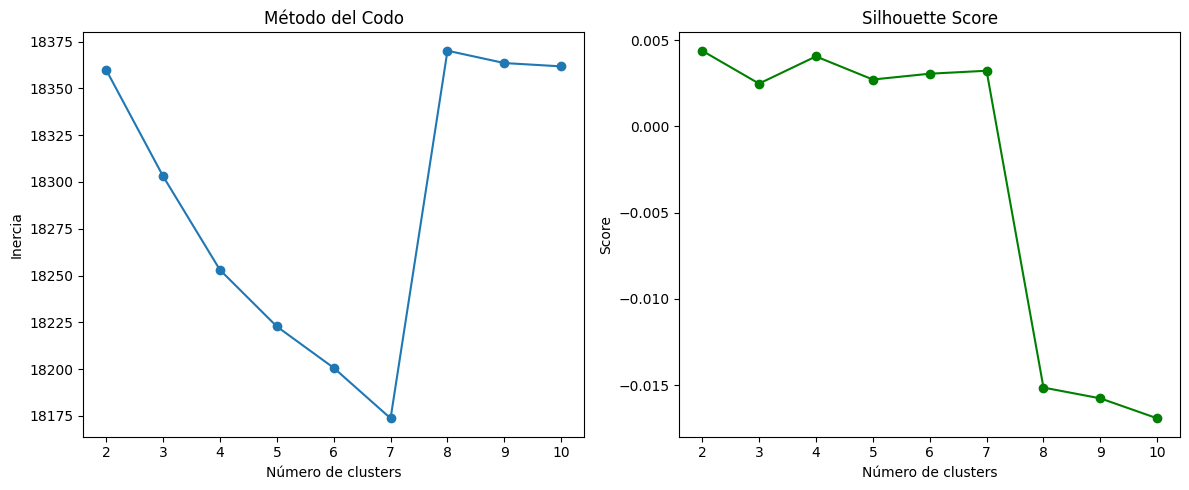

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

## 5.1 - Aplicación Final del Modelo

Basado en el método del codo y el Silhouette Score podemos ver que el número de clusters adecuado se encuentra entre 6 y 10, siendo 7 un buen punto de equilibrio entre simplicidad del modelo y separación de los grupos. Entonces usaremos "k=7"

In [15]:
# Elegimos el mejor k (por ejemplo, k=7 basado en los gráficos)
modelo_final = KMeans(n_clusters=7, random_state=42)

# Ajustar el modelo y asignar los clusters al DataFrame
df['cluster'] = modelo_final.fit_predict(X)

# Ver ejemplos por cluster
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Ejemplos del Cluster {c} ---")
    print(df[df['cluster'] == c]['body'].sample(1).values[0][:500]) # Muestra 1 ejemplo (primeros 500 caracteres)



--- Ejemplos del Cluster 0 ---
A friend of mine is cnsidering buying a new car, and is considering the
Subaru Impreza or the Nissan Altima right now.  Which of these two cars
would you recommend.  We definately want an airbag and ABS, and room for
tall people and long legs.

If you have other suggestions for cars under $13K after dealing I'd be
interested
in you opinions as well.

PLEASE send replies to sem1@postoffice.mail.cornell.edu, no tthis address.

THANKS!
Scott

--- Ejemplos del Cluster 1 ---
dabl2@nlm.nih.gov (Don A.B. Lindbergh) writes:

>In article <1993Apr15.204845.24939@nlm.nih.gov> dabl2@nlm.nih.gov (Don A.B. Lindbergh) writes:
>>
>>Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
>>Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
>>delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
>>if anyone else had seen this.
>>
>As a followup, this is a co-worker's mach

# 6. Reducción de Dimensionalidad y Visualización (opcional)

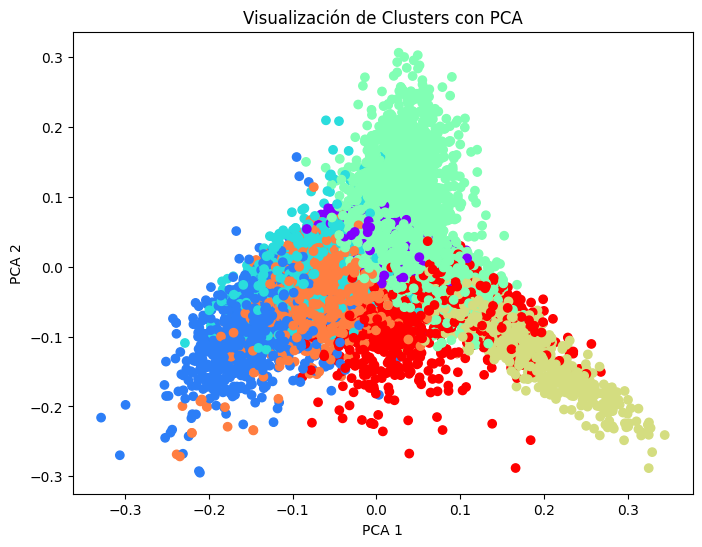

In [16]:
from sklearn.decomposition import PCA  # Importa PCA para reducción de dimensionalidad

# Crear el modelo PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Aplicar PCA al conjunto de datos (convertido a array denso)
X_pca = pca.fit_transform(X.toarray())

# Crear figura para graficar
plt.figure(figsize=(8,6))

# Graficar los documentos en 2D, coloreados por su cluster
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='rainbow')

# Títulos y etiquetas del gráfico
plt.title("Visualización de Clusters con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Mostrar la figura
plt.show()

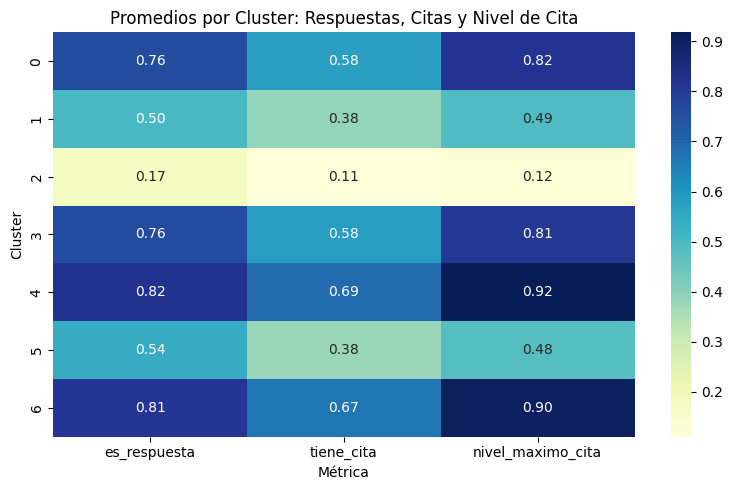

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por cluster y calcular el promedio de las métricas clave
resumen_clusters = df.groupby('cluster')[['es_respuesta', 'tiene_cita', 'nivel_maximo_cita']].mean()

# Crear el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(resumen_clusters, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Promedios por Cluster: Respuestas, Citas y Nivel de Cita")
plt.ylabel("Cluster")
plt.xlabel("Métrica")
plt.tight_layout()
plt.show()


In [18]:
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {c} ---")
    print(df[df['cluster'] == c]['subject'].sample(3).values)  # o ['body']



--- Cluster 0 ---
['Re: WHAT car is this!?' 'Information needed...' 'Draining battery']

--- Cluster 1 ---
['Re: HELP - SCSI Woes on Mac IIfx' 'Drivers for Diamond Viper Card'
 'Re: Quadra SCSI Problems???']

--- Cluster 2 ---
['WANTED: Audiomedia card' 'Books for sale cheap!!!!!'
 'New Mercedes Diesels']

--- Cluster 3 ---
['Re: Yet more Rushdie [Re: ISLAMIC LAW]' 'Re: Twitching eye?'
 'Re: The U.S. Holocaust Memorial Museum: A Costly and Dangerous Mistake']

--- Cluster 4 ---
['Re: The doctrine of Original Sin' 'Re: Sabbath Admissions 5of5'
 'Re: Nature of God (Re: Environmentalism and paganism)']

--- Cluster 5 ---
['WORD 2.0 HELP!' 'ISA bus pin question; re: Diamond Speedstar 24X'
 'PUT ANY PRINTED BOOK ON DISK']

--- Cluster 6 ---
['Re: Rewording the Second Amendment (ideas)'
 "Re: BD's did themselves--you're all paranoid freaks"
 'Re: We knew it would happen']
